# __Question 1 : PCA, choosing the dimension of data__

__A.Load dataset and explore the data__

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

data = pd.read_csv('sampletestdata1.csv',header='infer')



#data['Feature 4'] = np.random.randint(1, 10, data.shape[0])

# Insert a new row Feature 4
data.insert(3, "Feature 4", np.random.randint(1, 10, data.shape[0]))

data

,Feature 1,Feature 2,Feature 3,Feature 4,Class Label
0,5.235833,14.466327,2,6,1
1,4.721348,17.717240,2,2,1
2,4.948561,12.045614,2,3,1
3,4.758838,12.979223,2,7,1
4,3.008080,13.499321,2,9,1
...,...,...,...,...,...
995,0.595522,18.366753,2,6,0
996,1.151215,17.635233,2,9,0
997,13.805566,4.702994,2,6,0
998,7.822337,5.394940,2,1,0


__B.Split data into features (X) and Class Label (Y) using numpy__

In [146]:
X=data[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].to_numpy()
Y=data[['Class Label']].to_numpy()
Y=Y.reshape(-1)

__B. Data Visualization of input features and label in 2 Dimension__

Text(0.5, 0.92, 'Plot of data:Feature 1 verus Feature 2')

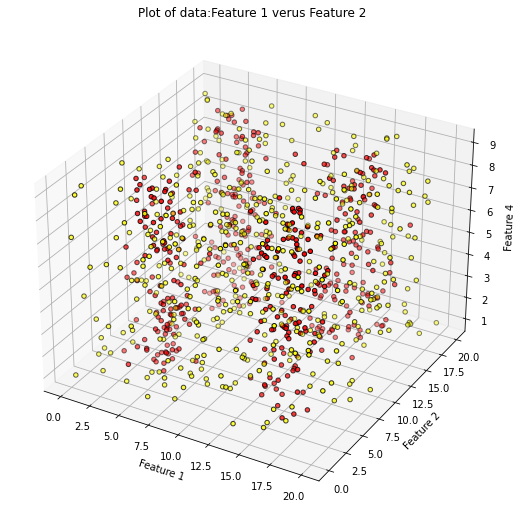

In [147]:
reds = Y == 1 # Class label 1
black = Y == 0 # Class Label 0

%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]
fig = plt.figure(figsize=(12,9)).gca(projection='3d')

fig.scatter(X[reds, 0], X[reds, 1],X[reds,3], c="red",s=20, edgecolor='k')
fig.scatter(X[black, 0], X[black, 1],X[black,3], c="yellow", s=20, edgecolor='k')
fig.set_xlabel("Feature 1")
fig.set_ylabel("Feature 2")
fig.set_zlabel("Feature 4")

plt.title("Plot of data:Feature 1 verus Feature 2")

# IF 3D
# import matplotlib.pyplot as plt

# %matplotlib inline

# plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

# fig = plt.figure(figsize=(12,9)).gca(projection='3d')
# fig.scatter(delta.MSFT,delta.F,delta.BAC)
# fig.set_xlabel('Microsoft')
# fig.set_ylabel('Ford Motor')
# fig.set_zlabel('Bank of America')
# _ = plt.show()

Plot show 4 clusters of class label 1 and backdrop of class label 0

__C.PCA EigenDecomposition__

In [148]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(X) # X is the three features in the dataset

PCA()

__D. Determine how many eigenvectors to use__

[4.55425546e-01 4.46697650e-01 9.78768038e-02 3.43993122e-36]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

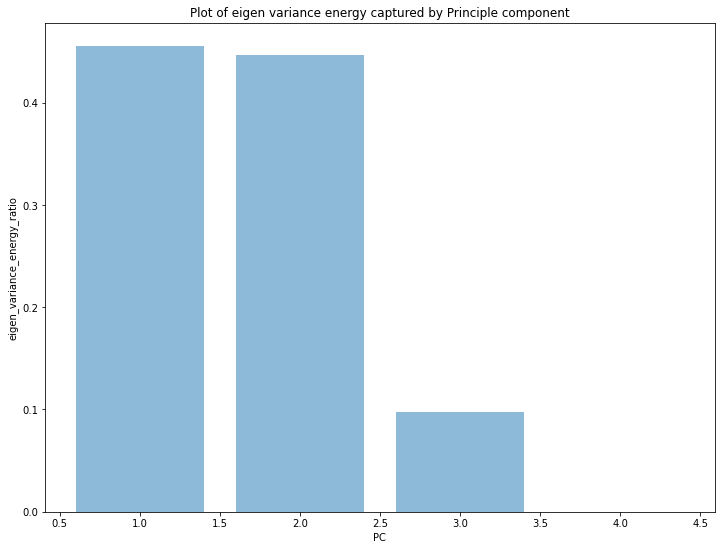

In [149]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy) # Will show three eigenvector and their percentages
# Third eigenvector is zero because feature 3 has no variance at all, all the data inside is the same
plt.bar(range(1,5), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

Since first two eigenvectors occupied 100% of the energy, 2 PCs are needed only. 3rd PC energy is 0

__E. Dimension Reduction using k no of PCs__

__i)2 PCs are used : Size of the dimension drops 1000x2__

In [150]:
pca_2 = PCA(n_components=2) # In test number of components to use depends on the minimum percentage of total variance energy
pca_2.fit(X)
X_pca_2=pca_2.transform(X)
print(X_pca_2)
print(X_pca_2.shape) #only 2 PC used

[[ 1.82185494  6.43275721]
 [ 0.73743035  9.51417622]
 [ 3.41800591  4.52365519]
 ...
 [-0.51505381 -6.34504873]
 [ 4.43906516 -2.64504252]
 [-5.35457996 -7.95690478]]
(1000, 2)


Text(0.5, 1.0, 'Projection of Data in Eigenspace')

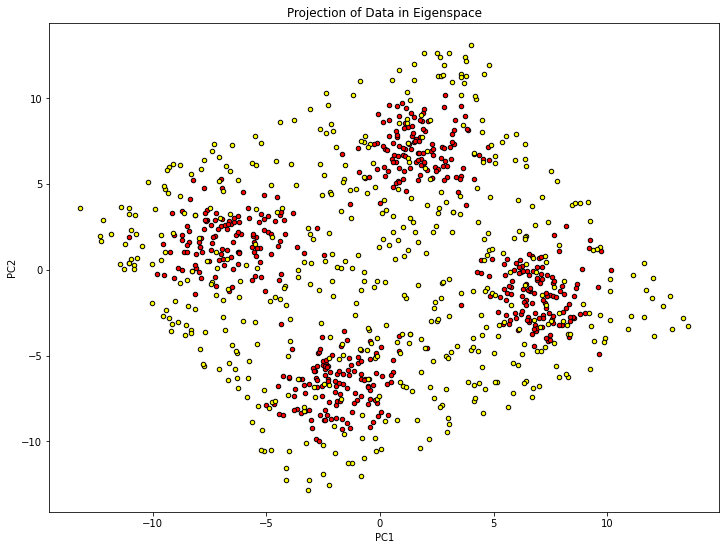

In [151]:
plt.scatter(X_pca_2[reds, 0], X_pca_2[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2[black, 0], X_pca_2[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

In [152]:
X_pca_2_back=pca_2.inverse_transform(X_pca_2)
print(X_pca_2_back) #transform back to data space

# Same as orginal data as we captured 100% of variation

[[ 5.27120382 14.47918887  2.          4.96746377]
 [ 4.61909232 17.68005797  2.          4.98499562]
 [ 4.88266697 12.02165384  2.          4.9235421 ]
 ...
 [13.83505404  4.71371669  2.          5.13919004]
 [ 7.68748687  5.34590616  2.          4.93647049]
 [18.81232244  5.81460571  2.          5.32340693]]


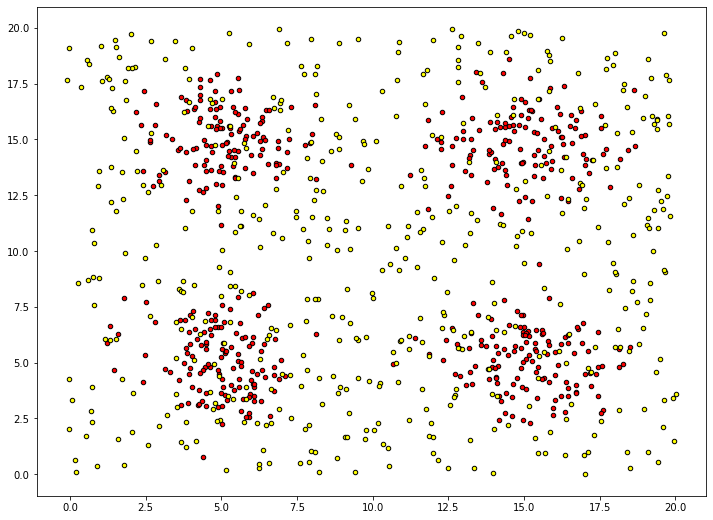

In [153]:
plt.scatter(X_pca_2_back[reds, 0], X_pca_2_back[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2_back[black, 0], X_pca_2_back[black, 1], c="yellow",s=20, edgecolor='k')
# plot in this case is same as original data as 3rd PC has no energy

__ii) All PC are used : Size of the dimension is still 1000x3(This part is Optional ,for understanding only)__

In [154]:
X_pca_all=pca_all.transform(X)
print(X_pca_all)
print(X_pca_all.shape)

[[ 1.82185494e+00  6.43275721e+00 -1.03322195e+00 -9.12318860e-16]
 [ 7.37430347e-01  9.51417622e+00  2.98697800e+00 -1.86050229e-15]
 [ 3.41800591e+00  4.52365519e+00  1.92481955e+00 -5.90822752e-16]
 ...
 [-5.15053815e-01 -6.34504873e+00 -8.61381640e-01  1.16262635e-15]
 [ 4.43906516e+00 -2.64504252e+00  3.93908475e+00  6.93964071e-16]
 [-5.35457996e+00 -7.95690478e+00  2.32494993e+00  7.27267049e-16]]
(1000, 4)


Text(0.5, 1.0, 'Projection of Data in Eigenspace')

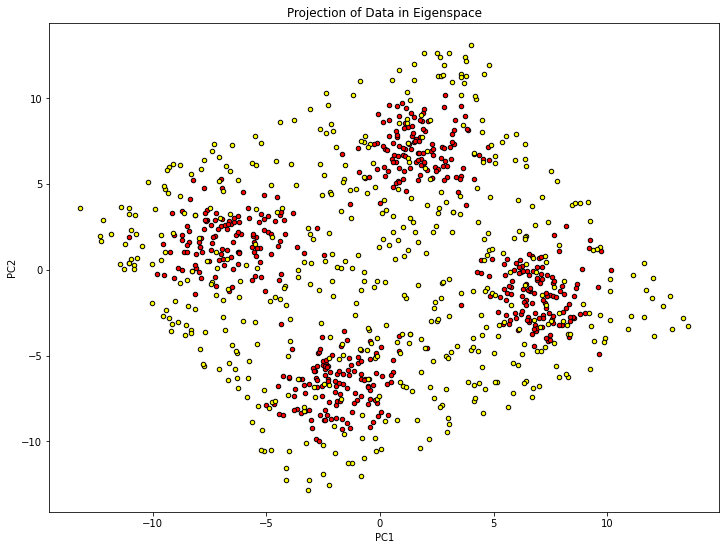

In [155]:
plt.scatter(X_pca_all[reds, 0], X_pca_all[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_all[black, 0], X_pca_all[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

In [156]:
X_pca_all_back=pca_all.inverse_transform(X_pca_all)
print(X_pca_all_back)

[[ 5.23583272 14.46632731  2.          6.        ]
 [ 4.72134789 17.71723992  2.          2.        ]
 [ 4.94856083 12.04561402  2.          3.        ]
 ...
 [13.80556568  4.7029942   2.          6.        ]
 [ 7.82233666  5.39493995  2.          1.        ]
 [18.89191428  5.84354672  2.          3.        ]]


Text(0.5, 1.0, 'Project all PC back to data')

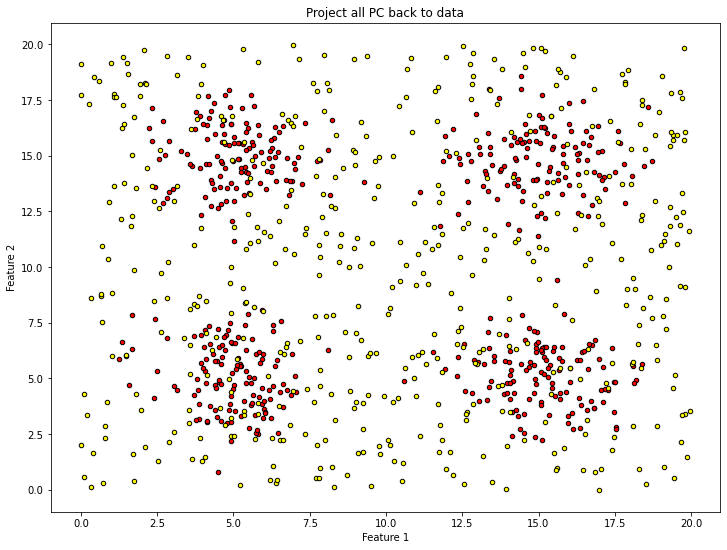

In [157]:
plt.scatter(X_pca_all_back[reds, 0], X_pca_all_back[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_all_back[black, 0], X_pca_all_back[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Project all PC back to data') # plot must be same as original data as no PC removed

# __Question 2 : Classifier on given labels__

__1. Create training and testing dataset from the Principle Component Data data based on 70,30 split__

In [158]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

__2. Test the performance of KNN and determine the best value of K to choose. Use Euclidean distance__

Text(0, 0.5, 'Accuracy')

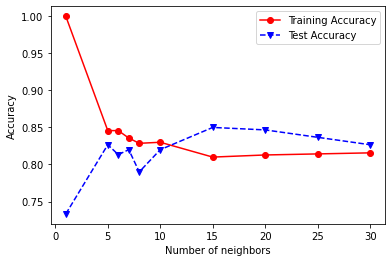

In [159]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, Y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

K=5 is the knee point for both Training and Testing data. Therefore let k=5 

__3.Test the performance of Decison Tree Classifier and determine the optimal max_depth__

Text(0, 0.5, 'Accuracy')

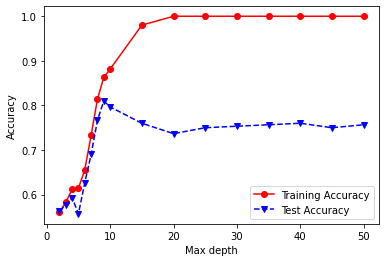

In [160]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################
from sklearn.tree import DecisionTreeClassifier
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, Y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Maxdepth=10 is the knee point for Testing data. Therefore let Max_depth=10

__4. Decision Boundary Visualization of KNN and Decision Tree__

(275, 259)
(275, 259)


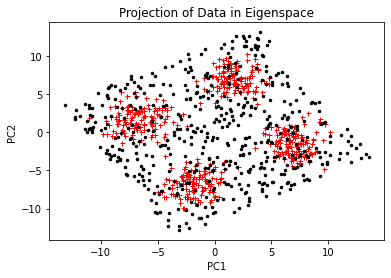

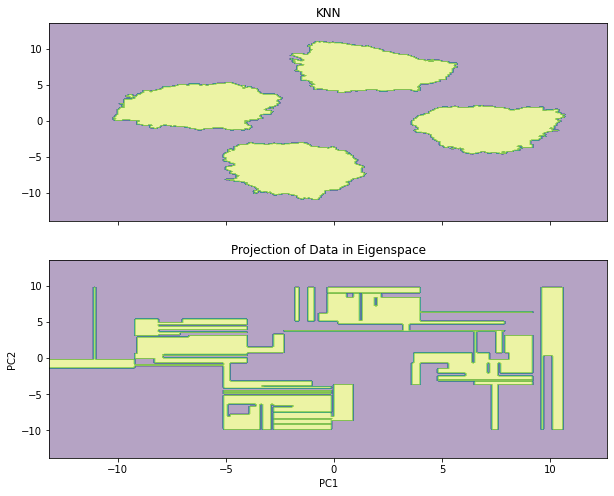

In [161]:
N=1000 # no. of row in the given data is 1000
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

plt.plot(X_pca_2[:int(N/2),0],X_pca_2[:int(N/2),1],'r+',X_pca_2[int(N/2):,0],X_pca_2[int(N/2):,1],'k.',ms=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

f, axarr = plt.subplots(2, sharex='col', sharey='row', figsize=(10, 8))

print(xx.shape)
print(yy.shape)
for idx, clf, tt in zip([[0], [1]], [clf1, clf2],['KNN', 'Decision Tree']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0]].set_title(tt)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Projection of Data in Eigenspace')
plt.show()



In terms of accuracy and decision boundary performance, KNN is slighly better

# __Question 3: Clustering__

In [162]:
from scipy.spatial import distance

#Compute distance between each pair of the two collections of inputs.
dis = distance.cdist(X_pca_2, X_pca_2, 'euclidean')
print(dis)

[[ 0.          3.266668    2.48844699 ... 12.9897447   9.44755193
  16.07991263]
 [ 3.266668    0.          5.66487295 ... 15.90860562 12.71018099
  18.50273657]
 [ 2.48844699  5.66487295  0.         ... 11.55844642  7.24104888
  15.25524958]
 ...
 [12.9897447  15.90860562 11.55844642 ...  0.          6.18331147
   5.10089142]
 [ 9.44755193 12.71018099  7.24104888 ...  6.18331147  0.
  11.14142565]
 [16.07991263 18.50273657 15.25524958 ...  5.10089142 11.14142565
   0.        ]]


In [163]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X_pca_2) 
labels = k_means.labels_
print('labels:', labels)
abc = data.squeeze()
pd.DataFrame(labels, index=abc['Class Label'], columns=['Cluster ID'])

labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

,Cluster ID
Class Label,
1,1
1,1
1,1
1,1
1,1
...,...
0,1
0,1
0,0


In [164]:
centroids = k_means.cluster_centers_
data = data.drop(['Feature 3', 'Feature 4', 'Class Label'], axis=1)
print(centroids)
print(data.columns)

[[-4.45968441 -2.45170588]
 [ 4.30197454  2.36500509]]
Index(['Feature 1', 'Feature 2'], dtype='object')


In [165]:
pd.DataFrame(centroids,columns=data.columns)

,Feature 1,Feature 2
0,-4.459684,-2.451706
1,4.301975,2.365005


In [ ]:
# import numpy as np

# testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
# labels = k_means.predict(testData)
# labels = labels.reshape(-1,1) # -1: the unspecified value will inferred
# usernames = np.array(['Lawrence','Alicia','Jacob','Thiru','Ifa']).reshape(-1,1)
# cols = movies.columns.tolist()
# cols.append('Cluster ID')
# newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
# newusers

In [ ]:
# import matplotlib.pyplot as plt

# # Make plot outputs appear and be stored within the notebook
# %matplotlib inline

# plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

# numClusters = [1,2,3,4,5,6]
# SSE = []
# for k in numClusters:
#     k_means = cluster.KMeans(n_clusters=k)
#     k_means.fit(data)
#     SSE.append(k_means.inertia_) # Sum of squared distances of samples to their closest cluster center

# plt.xlabel('Number of Clusters')
# plt.ylabel('SSE')
# plt.plot(numClusters, SSE)